In [1]:
import sympy as sp

In [3]:
v, wb = sp.symbols('v, \omega_{-}', positive=True, real=True)
wb

\omega_{-}

In [37]:
w1 = sp.sqrt(3)
gamma = 1/sp.sqrt(1 - v**2)
w = 2*w1
k = sp.sqrt(w**2 - 4)
doppler = gamma*(w + k*v)
eq = doppler - 3*wb
eq

-3*\omega_{-} + (2*sqrt(2)*v + 2*sqrt(3))/sqrt(1 - v**2)

In [38]:
v1, v2 = sp.solve(eq, v)

In [39]:
v1

(-3*\omega_{-}*sqrt(9*\omega_{-}**2 - 4) - 4*sqrt(6))/(9*\omega_{-}**2 + 8)

In [40]:
v2

(3*\omega_{-}*sqrt(9*\omega_{-}**2 - 4) - 4*sqrt(6))/(9*\omega_{-}**2 + 8)

In [41]:
sp.solve(v2 - v, wb)[0]

sqrt(-1/(9*v**2 - 9))*sqrt(8*v**2 + 8*sqrt(6)*v + 12)

In [42]:
H = sp.symbols('H')
kb = -3*H/2 - sp.sqrt(1 - 3*H**2/4)
wH = sp.sqrt(4 - kb**2)

In [48]:
2*float(v2.subs({wb:wH}).subs({H:0.3}))

0.46522918224975696

In [3]:
H, kappa, x = sp.symbols('H, kappa, x', real=True)
k = sp.I*kappa
psi = sp.exp(sp.I*k*x)*(3*sp.tanh(x)**2 - k**2 - 1 - 3*sp.I*k*sp.tanh(x))
psi

(kappa**2 + 3*kappa*tanh(x) + 3*tanh(x)**2 - 1)*exp(-kappa*x)

In [4]:
om, t = sp.symbols('omega, t', real=True)
Psi = sp.cos(om*t)*psi
Psi

(kappa**2 + 3*kappa*tanh(x) + 3*tanh(x)**2 - 1)*exp(-kappa*x)*cos(omega*t)

In [5]:
def V(y):
    return (y**2 - 1)**2/2

In [6]:
sp.tanh(x).rewrite(sp.exp)

(exp(x) - exp(-x))/(exp(x) + exp(-x))

In [7]:
dE = (psi.diff(x)**2)/2 + V(psi)
dE

((kappa**2 + 3*kappa*tanh(x) + 3*tanh(x)**2 - 1)**2*exp(-2*kappa*x) - 1)**2/2 + (-kappa*(kappa**2 + 3*kappa*tanh(x) + 3*tanh(x)**2 - 1)*exp(-kappa*x) + (3*kappa*(1 - tanh(x)**2) + 3*(2 - 2*tanh(x)**2)*tanh(x))*exp(-kappa*x))**2/2

In [8]:
E = sp.lambdify((x, kappa), dE, modules=('scipy', 'numpy'))

In [9]:
import numpy as np
from scipy.integrate import simpson
import matplotlib.pyplot as plt

In [10]:
K = np.linspace(0, 2, 5000)
X = np.linspace(0, 20, 500)
Ek = [simpson(E(X, k), x=X) for k in K]

[]

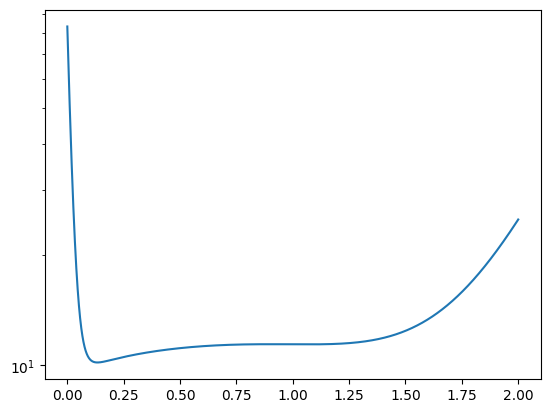

In [11]:
plt.plot(K, Ek)
plt.semilogy()

In [12]:
K[np.argmin(Ek)]

0.133626725345069

In [17]:
H = np.linspace(-1, 1, 500)
K1 = -3*H/2 + np.sqrt(1 - 3*H**2/4)
K2 = -3*H/2 - np.sqrt(1 - 3*H**2/4)
E1 = [simpson(E(X, k), x=X) for k in K1]
E2 = [simpson(E(X, k), x=X) for k in K2]

[]

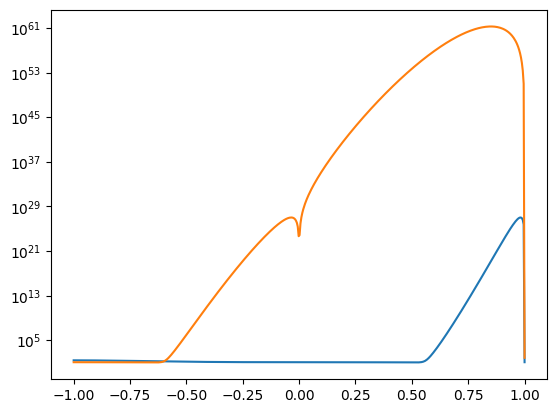

In [18]:
plt.plot(H, E1)
plt.plot(H, E2)
plt.semilogy()

(10.0, 30.0)

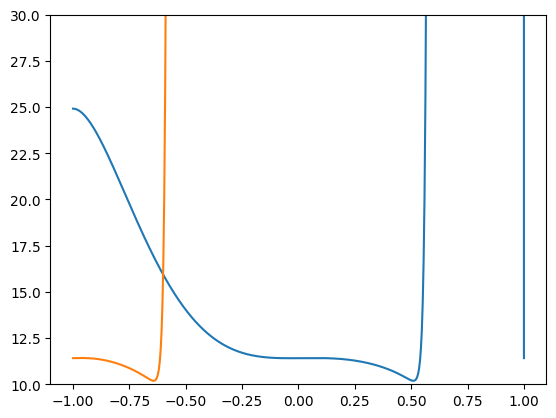

In [19]:
plt.plot(H, E1)
plt.plot(H, E2)
plt.ylim(10, 30)

In [92]:
H[np.argmin(E1)], H[np.argmin(E2)]

(0.5110220440881763, -0.6432865731462927)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def psi(x, k):
    return np.exp(1j*k*x)*(3*np.tanh(x)**2 - k**2 - 1 - 3j*k*np.tanh(x))

def kappa(H):
    return -3*H/3 + np.sign(1 - np.abs(H))*np.sqrt(1 - 3*H**2/4)

def U(x):
    return 6*np.tanh(x)**2 - 2

def chi(H):
    return np.arctanh(H**np.sign(1 - np.abs(H)))

/home/jairo/Documentos/GitHub/parallel-kink-scattering/.env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jairo/Documentos/GitHub/parallel-kink-scattering/.env/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-3.0, 5.0)

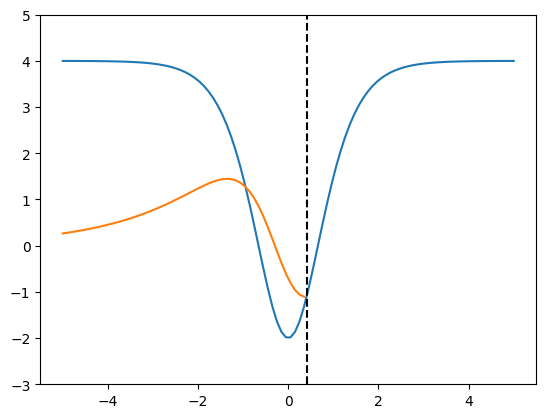

In [45]:
x = np.linspace(-5, 5, 100)
plt.plot(x, U(x))

H = 0.4
X = chi(H)
plt.plot(x[x<X], psi(-x[x<X], 1j*kappa(H)))

plt.axvline(X, c='k', ls='--')
plt.ylim(-3, 5)

(-10.0, 0.0)

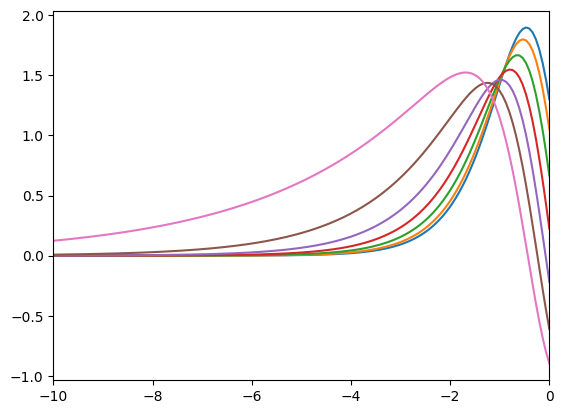

In [40]:
x = np.linspace(-10, 0, 150)
for H in np.linspace(-1, 1, 10)[1:-2]:
    plt.plot(x, psi(x, -1j*kappa(H)))

plt.xlim(-10, 0)